#  Исследование данных авиакомпании — проверить гипотезу о повышении спроса на билеты во время фестивалей.


## Описание проекта
Произвести выгрузки и подготовку данных авиакомпаний, 
проверить гипотезу о различии среднего спроса на билеты во время различных событий.

1. [Изучение общей информации](#Шаг-1.-Изучение-общей-информации.)
2. [Выберем топ-10 городов по количеству рейсов.](#Шаг-2.-Выберем-топ-10-городов-по-количеству-рейсов.)
3. [Построим графики](#Шаг-3.-Построим-графики.)
4. [Общий вывод](#Шаг-4.-Общий-вывод.)

### Шаг 1. Изучение общей информации.

Импортирование модулей, необходимых для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def df_view(df):
    """
    Быстрый обзор таблицы
    """
    display(df)
    a = df.duplicated().sum()
    print(df.info())
    print()
    print('Количество дубликатов в таблице', a)

Чтение данных и визуалиция таблицы

In [3]:
df = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(df)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

Количество дубликатов в таблице 0


In [4]:
df1 = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(df1)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

Количество дубликатов в таблице 0


#### Вывод
Данные для анализа представлены в 2 таблицах `df` и `df1`. 

Таблица `df` имеет 2 столбца с данными:
`model`- модель самолета - тип `object` (текстовые выражения),
`flights_amount `- количество рейсов для каждой модели в сентябре 2018г - тип `int64`.

Таблица `df1` имеет 2 столбца с данными:
`city`- город - тип `object` (текстовые выражения),
`average_flights`- среднее количество рейсов, прибывающих в city за день в августе 2018г - тип `float64`.

Количество значений в столбцах совпадает, значит пропущенных значений нет. В названиях столцов нет заглавных букв, приведение к единому регистру не требуется. Дубликатов в таблицах нет.

Типы данных в столбцах соответствуют ожидаемым, поэтому замены на другие типы не требуется.

### Шаг 2. Выберем топ-10 городов по количеству рейсов.

In [5]:
df2 = df1.sort_values(by='average_flights', ascending=False)
df2.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


#### Вывод
Полученные результаты вполне логичны.
В первую 10-ку входят самые крупные города России, а также удобные с точки зрения логистики города-транспортные хабы.

### Шаг 3. Построим графики.

Напишем функцию для построения однотипных графиков 

In [6]:
def picture(df, x, y, **kwargs):
    df.plot(x, y, kind='bar', **kwargs)
    plt.title('График зависимости '+y+' от '+x)
    plt.xlabel(x)
    plt.ylabel(y) 

    plt.show()

Построим график зависимости количества рейсов, совершенных в сентябре 2018 года,  от модели самолета.

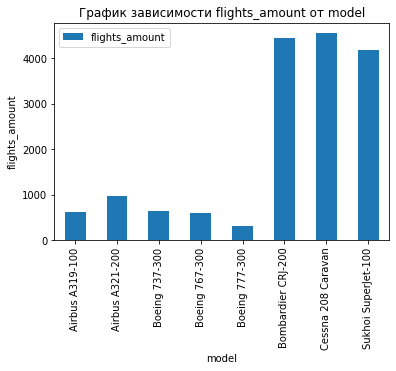

In [7]:
picture(df, 'model', 'flights_amount')  

Три модели самолета в авиакомпании значительно обгоняют оставшиеся по количеству перелетов - это `Bombardier CRJ-200`, `Cessna 208 Caravan`,`Sukhoi SuperJet-100`. Эти три самолета гораздо меньше по размеру `Airbus` и `Boeing`, имеют небольшую вместимость пассажиров (максимум Sukhoi SuperJet-100 до 108 человек). Они зачастую совершают перелеты на небольшие дистанции, в связи с этим количество перелетов у них может быть больше. Кроме того, возможно штат авиакомпании имеет большое количество самолетов этих моделей, с чем и связана такая разница в количестве перелетов.

Построим график зависимости количества рейсов, прибывающих за день в августе 2018 года, от города России

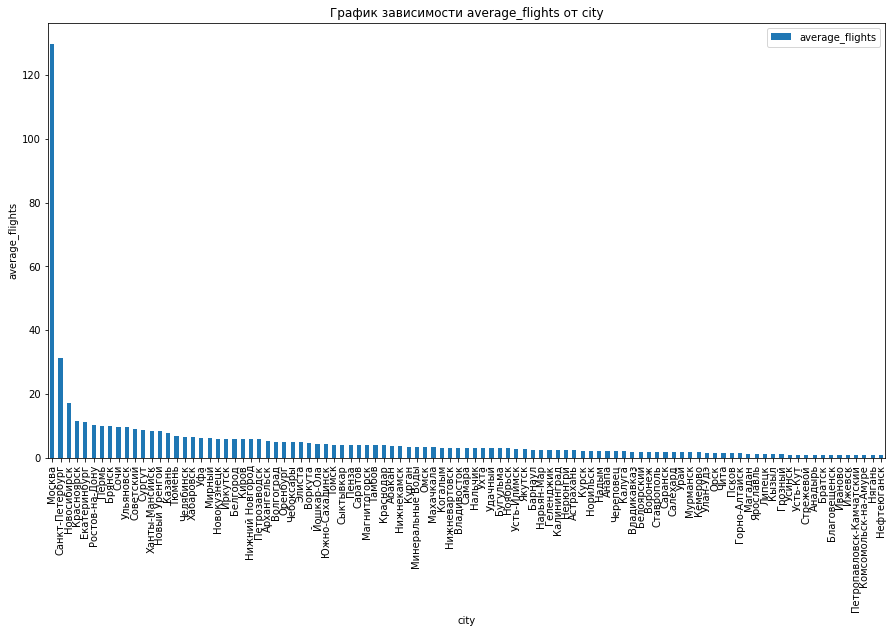

In [8]:
picture(df2, 'city', 'average_flights', figsize=(15,8)) 

Москва - безоговорочный лидер по числу прибывающих самолетов авиакомпании. Из графика видно, что большинство городов имеет среднее количество прилетающих рейсов за день до 5. Из них выбиваются города, которые мы рассмотрим на следующем графике.

Построим график зависимости количества рейсов, прибывающих за день в августе 2018 года, в топ-10 городах

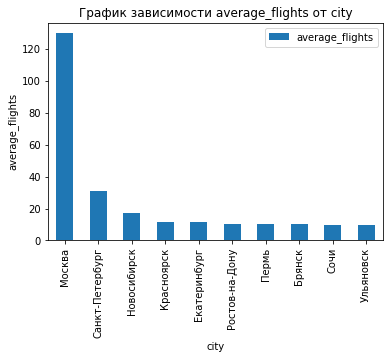

In [9]:
picture(df2[:10], 'city', 'average_flights')

График по топ-10 городам подтвержает, что Москва и Санкт-Петербург являются лидерами по числу прибывающих рейсов. Новосибирск на третьем месте, прибывает примерно 18 рейсов день, остальные города примерно одинаково принимают около 10 рейсов в день. Не совсем понятно, как в топ-10 попали Брянск и Ульяновск. Города небольшие, и не являются загруженными аэропортами по мнению [Википедии](https://ru.wikipedia.org/wiki/Список_наиболее_загруженных_аэропортов_России#2018_год
). Скорей всего эти города попали в топ-10  с связи с предпочтениями полетов в них пассажиров, что реализуется нашей авиакомпанией.

### Шаг 4. Общий вывод.

Проанализировали данные авиакомпании «F9» по пассажирским авиаперевозкам. 

Полученные данные для анализа корректны, пропущенных значений нет, замену типов данных не производили.
Выбрали топ-10 городов по количеству прибывающих рейсов и построили графики зависимостей количества рейсов от модели самолета и города. 

Лидеры по количеству авиаперелетов три модели самолета `Bombardier CRJ-200`, `Cessna 208 Caravan`,`Sukhoi SuperJet-100`. Скорей всего большая часть рейсов авиакомпании совершается на небольшие расстояния этими некрупными самолетами, вмещающими максимум до 100 пассажиров, что характерно для "малой авиации".

При этом компания совершает большое число рейсов в самые крупные города России, а также удобные с точки зрения логистики города-транспортные хабы, что конечно вызвано большим спросом и пассажиропотоком в эти города. В топ-10 также вошли Ульяновск и Брянск, скорей всего в связи с предпочтениями полетов в них пассажиров
